<a href="https://colab.research.google.com/github/Valerie-Osawe/Stutern/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict A Person's Salary



### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary:
```

### Objective

```
Predict whether a person makes over 50K a year.

```

In [1]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000



In [2]:
# Load the dataset
salary = pd.read_csv("salary.csv")

# Check the first few rows of the dataset
salary.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Data Exploration and Preprocessing

 The data needs to cleaned and preprocessed the before we can use it to train our machine learning model. This will involve handling missing values, converting categorical variables to numerical.



In [3]:
# Check the shape of the dataset
salary.shape

(32560, 15)

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Check for missing values
salary.isnull().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [6]:
# explore the country column
salary.Country.value_counts(normalize = True)

 United-States                 0.895854
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004208
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003256
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


From the data distribution seen above there are many rare labels. It can be seen that 91% of the country is United States. This means the data is highly imbalanced. Therefore i will categorize the other countries as outside-US.

In [7]:
# Dropping rows with '?' in the dataframe

# Replace '?' with NaN
salary.replace(' ?', np.nan, inplace=True)

# Drop rows with NaN values
salary.dropna(inplace=True)

In [8]:
us = salary[salary['Country'] == ' United-States']['Country'].unique()
# Replace rare labels with 'Outside-Us'
salary.loc[~salary['Country'].isin(us), 'Country'] = ' Outside-Us'

# check the variables in the country column
salary.Country.value_counts(normalize = True)

 United-States    0.911873
 Outside-Us       0.088127
Name: Country, dtype: float64

In [9]:
# explore the occupation column
salary.Occupation.value_counts(normalize = True)

 Prof-specialty       0.133882
 Craft-repair         0.133616
 Exec-managerial      0.132356
 Adm-clerical         0.123338
 Sales                0.118829
 Other-service        0.106495
 Machine-op-inspct    0.065184
 Transport-moving     0.052120
 Handlers-cleaners    0.044760
 Farming-fishing      0.032791
 Tech-support         0.030238
 Protective-serv      0.021352
 Priv-house-serv      0.004741
 Armed-Forces         0.000298
Name: Occupation, dtype: float64

In [10]:
# explore the Race column
salary.Race.value_counts(normalize = True)

 White                 0.859786
 Black                 0.093399
 Asian-Pac-Islander    0.029674
 Amer-Indian-Eskimo    0.009482
 Other                 0.007659
Name: Race, dtype: float64

Again the race column is imbalanced. 86% of the race are white in the dataset, therefore the rare labels will be categorize as others.

In [11]:
white = salary[salary['Race'] == ' White']['Race'].unique()
# Replace rare labels with 'Outside-Us'
salary.loc[~salary['Race'].isin(white), 'Race'] = ' Others'

# check the variables in the country column
salary.Race.value_counts(normalize = True)

 White     0.859786
 Others    0.140214
Name: Race, dtype: float64

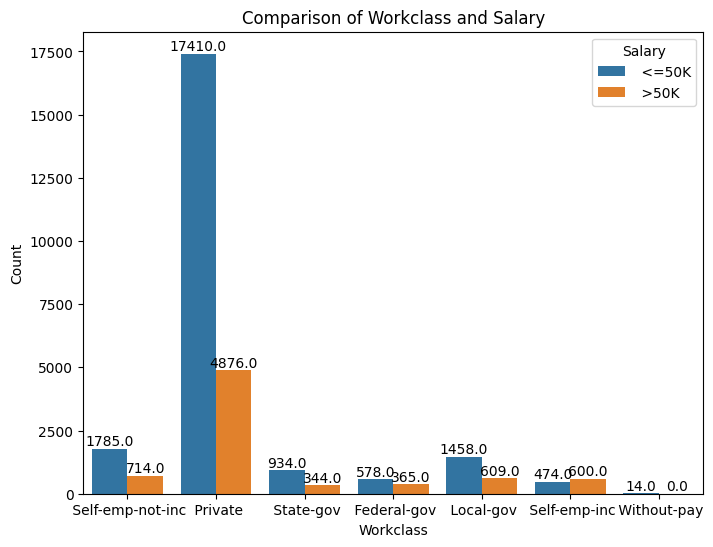

In [12]:
def plot_stacked_bar(df, x_col, hue_col, figsize = (10, 8)):
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x=x_col, hue=hue_col)
    plt.xlabel(x_col)
    plt.ylabel('Count')
    plt.title(f'Comparison of {x_col} and {hue_col}')
    plt.legend(title=hue_col)

    # Add value counts above each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.show()

# Call function
plot_stacked_bar(salary, 'Workclass', 'Salary', figsize = (8,6))

From the plot above it can be seen that most of the workclass from the dataset were Private and it also had the highest people with salaries greater than 50K. The others can be classified as rare labels and therefore be converted to Others.

In [13]:
private = salary[salary['Workclass'] == ' Private']['Workclass'].unique()
# Replace rare labels with 'others'
salary.loc[~salary['Workclass'].isin(private), 'Workclass'] = ' Others'

# check the variables in the country column
salary.Workclass.value_counts(normalize = True)

 Private    0.738901
 Others     0.261099
Name: Workclass, dtype: float64

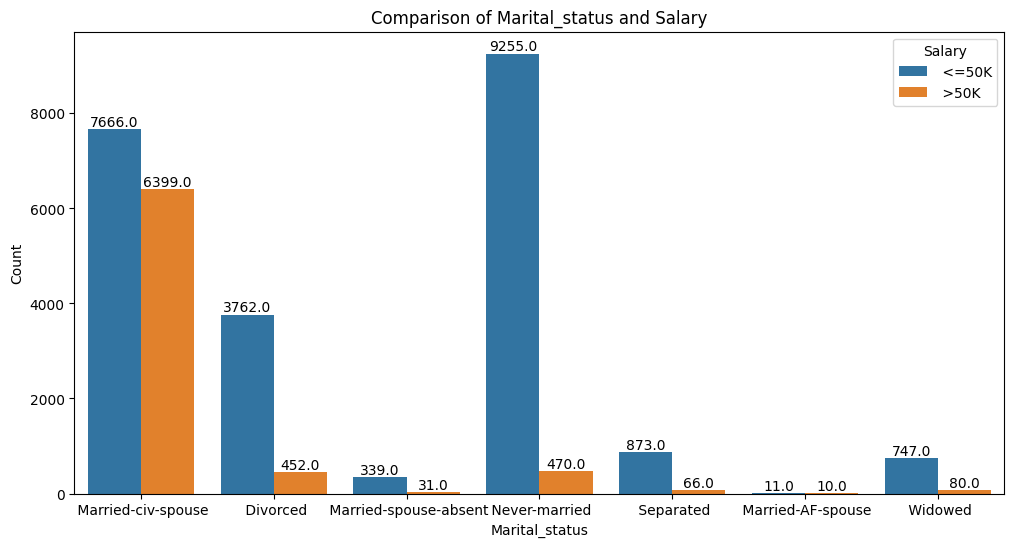

In [14]:
plot_stacked_bar(salary, 'Marital_status', 'Salary', figsize = (12,6))

From the plot above it can be seen that the married-civ-spouse had the highest people with salaries greater than 50K and there are still rare labels in the column.

In [15]:
new_var =  [' Married-spouse-absent', ' Married-AF-spouse']

salary.loc[salary['Marital_status'].isin(new_var), 'Marital_status'] = ' Married-civ-spouse'

# check the variables in the marital_status column
salary.Marital_status.value_counts(normalize = True)

 Married-civ-spouse    0.479294
 Never-married         0.322436
 Divorced              0.139717
 Separated             0.031133
 Widowed               0.027420
Name: Marital_status, dtype: float64

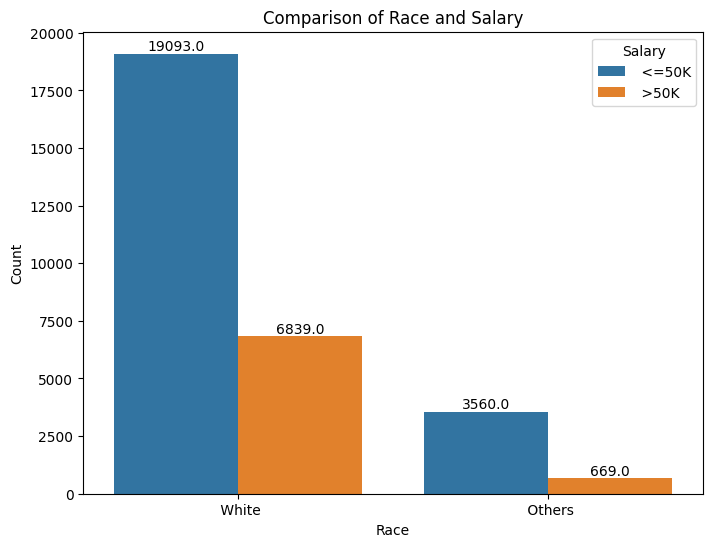

In [16]:
plot_stacked_bar(salary, 'Race', 'Salary', figsize = (8,6))

It can be seen that the white race has people that earn more than 50K.

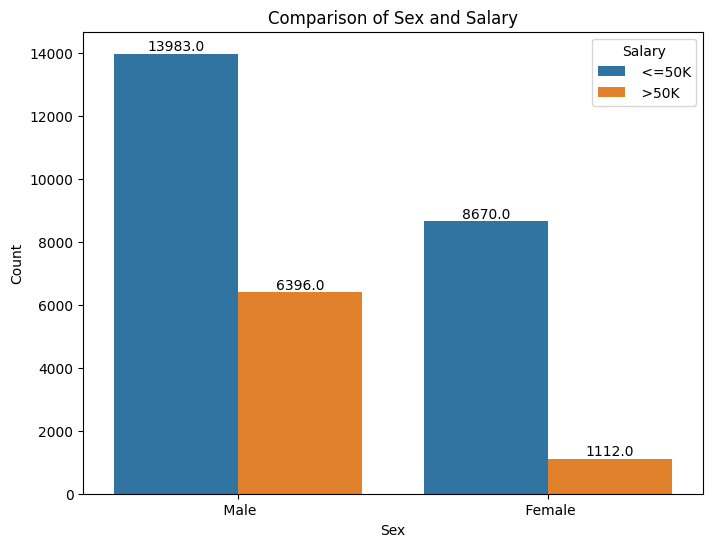

In [17]:
plot_stacked_bar(salary, 'Sex', 'Salary', figsize = (8,6))

From the plot it can be seen that males make more than 50K.

In [18]:
salary.Education.value_counts(normalize = True)


 HS-grad         0.326249
 Some-college    0.221412
 Bachelors       0.167203
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: Education, dtype: float64

In [19]:
salary.Education_num.value_counts(normalize = True)

9     0.326249
10    0.221412
13    0.167203
14    0.053944
11    0.043334
7     0.034747
12    0.033421
6     0.027187
4     0.018468
15    0.017970
5     0.015086
8     0.012500
16    0.012433
3     0.009549
2     0.005006
1     0.001492
Name: Education_num, dtype: float64

From the above distribution of values it is very likely that education and education_num columns represent the same data, so the education column will be dropped. It also appears that they are many rare labels here.

In [20]:
salary.drop(['Education_num'], axis = 1, inplace = True)

In [21]:
# Calculate the threshold for rare categories
threshold = 0.05  # Set the threshold as 5% of the total rows

# Get the value counts of 'Eduacation'
value_counts = salary['Education'].value_counts(normalize=True)

# Create a mask for rare categories based on the threshold
rare_categories = value_counts[value_counts < threshold].index

# Replace rare categories with 'Other'
salary.loc[salary['Education'].isin(rare_categories), 'Education'] = ' Others'

# Recalculate the value counts after combining rare categories
salary['Education'].value_counts(normalize=True)

 HS-grad         0.326249
 Others          0.231193
 Some-college    0.221412
 Bachelors       0.167203
 Masters         0.053944
Name: Education, dtype: float64

In [22]:
# Check the distribution of the target variable
salary["Salary"].value_counts(normalize = True)

 <=50K    0.751069
 >50K     0.248931
Name: Salary, dtype: float64

In [23]:
# Convert the target variable to numerics where data type to int
# <=50K will be 0 and >50K will be 1
salary['Salary'] = salary['Salary'].str.strip().replace({'<=50K': 0, '>50K': 1})
print(salary['Salary'])

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Salary, Length: 30161, dtype: int64


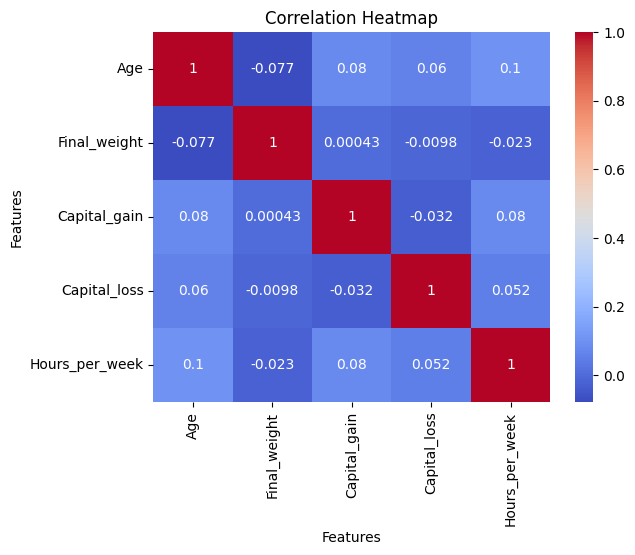

In [24]:
#
num_variable = [
        "Age",
        "Final_weight",
        "Capital_gain",
        "Capital_loss",
        "Hours_per_week",
    ]
# Create a random correlation matrix
corr_matrix = salary[num_variable].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

From the plot it can be seen that there are no correlations between any of the numeric coulmns.

In [25]:
correl = salary[num_variable].corrwith(salary['Salary'])
print(correl)

Age               0.242000
Final_weight     -0.008978
Capital_gain      0.221200
Capital_loss      0.150050
Hours_per_week    0.229480
dtype: float64


From the information above the numeric variable has no high correlation with the target variable, that is the salary column.

In [26]:
salary.describe()

,Age,Final_weight,Capital_gain,Capital_loss,Hours_per_week,Salary
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,1091.971984,88.375419,40.931269,0.248931
std,13.134882,1.056527e+05,7406.466659,404.304753,11.980182,0.432401
min,17.000000,1.376900e+04,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176280e+05,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784290e+05,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376300e+05,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000,1.000000


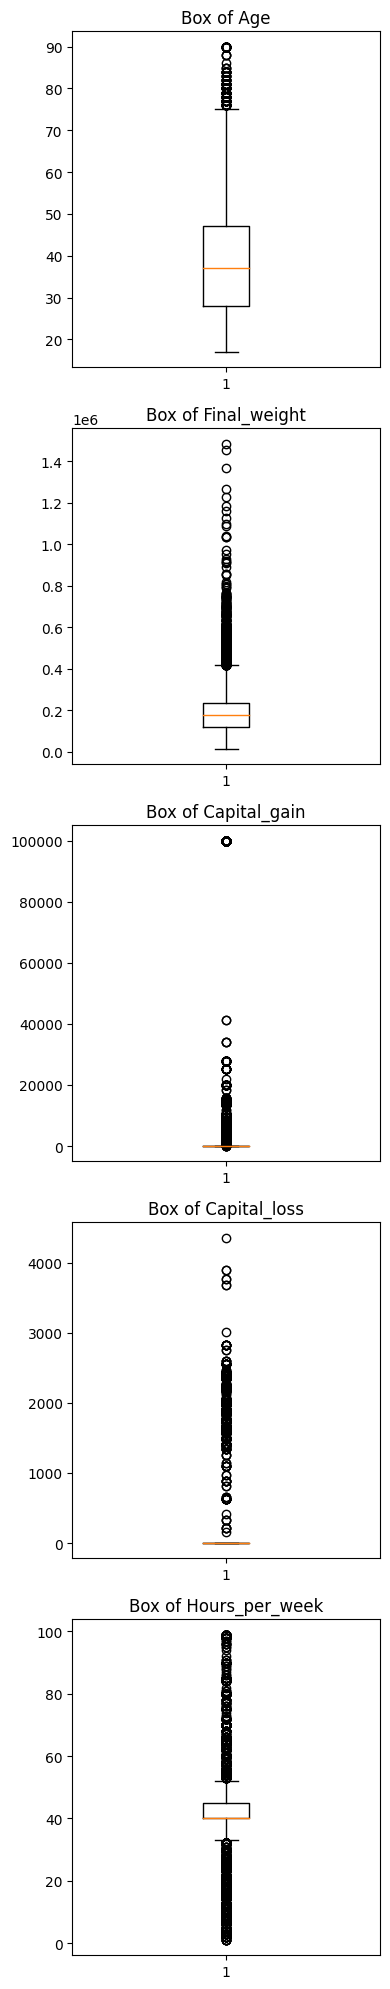

In [27]:
# Function to plot box plots of different columns
def plot_boxplots(df):

    # Create subplots for each column
    fig, axes = plt.subplots(nrows=len(num_variable), figsize=(4, 4 * len(num_variable)))

    # Iterate over columns and plot box plots
    for i, col in enumerate(num_variable):
        ax = axes[i] if len(num_variable) > 1 else axes  # Handle single subplot case
        ax.boxplot(df[col])
        ax.set_title(f'Box of {col}')

    # Adjust spacing between subplots
    plt.tight_layout()

# Call the function to plot box plots of columns
plot_boxplots(salary)
plt.show()



From the box plots above, it can be seen that the Age, Final_weight, Capital_gain, Capital_loss, Hours_per_week columns all have lots of outliers and the Eduaction_num column is a right-skewed distribution.

In [28]:
from sklearn.preprocessing import LabelEncoder

cat_vars = [
    "Workclass",
    "Education",
    'Marital_status',
    'Race',
    'Relationship',
    "Occupation",
    "Sex",
    "Country",
]
# Convert categorical variables to dummy variables
salary = pd.get_dummies(salary, columns=cat_vars)


salary.head()

,Age,Final_weight,Capital_gain,Capital_loss,Hours_per_week,Salary,Workclass_ Others,Workclass_ Private,Education_ Bachelors,Education_ HS-grad,Education_ Masters,Education_ Others,Education_ Some-college,Marital_status_ Divorced,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Race_ Others,Race_ White,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Sex_ Female,Sex_ Male,Country_ Outside-Us,Country_ United-States
0,50,83311,0,0,13,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,38,215646,0,0,40,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,53,234721,0,0,40,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,28,338409,0,0,40,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,37,284582,0,0,40,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [29]:
# Scale the numerical variables
from sklearn.preprocessing import StandardScaler
#new_num_var = ["Age", 'Final_weight', 'Hours_per_week']
scaler = StandardScaler()
salary[num_variable] = scaler.fit_transform(salary[num_variable])
salary.head()

,Age,Final_weight,Capital_gain,Capital_loss,Hours_per_week,Salary,Workclass_ Others,Workclass_ Private,Education_ Bachelors,Education_ HS-grad,Education_ Masters,Education_ Others,Education_ Some-college,Marital_status_ Divorced,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Race_ Others,Race_ White,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Sex_ Female,Sex_ Male,Country_ Outside-Us,Country_ United-States
0,0.880275,-1.007909,-0.147437,-0.21859,-2.331495,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,-0.033338,0.244659,-0.147437,-0.21859,-0.077735,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,1.108678,0.425206,-0.147437,-0.21859,-0.077735,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,-0.794682,1.406626,-0.147437,-0.21859,-0.077735,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,-0.109472,0.897147,-0.147437,-0.21859,-0.077735,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


The columns originally with numeric values were standardized. This is because Standardization of data improves performance of some models  can help to reduce the impact of skewed distributions or extreme values.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = salary.drop(columns=["Salary"])
y = salary["Salary"]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create a random forest classifier
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(X_train, y_train)

# Retrieve feature importances
feature_importances = rf.feature_importances_

# Create a dataframe to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the top 10 most important features
print(feature_importance_df.head(10))

# Select top 5 features
selected_features = feature_importance_df['Feature'].head(5).tolist()

# Retrain the model using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the random forest model with selected features
rf_selected = RandomForestClassifier()
rf_selected.fit(X_train_selected, y_train)

# Evaluate model performance on selected features
accuracy = rf_selected.score(X_test_selected, y_test)
print("Accuracy on selected features:", accuracy)


                               Feature  Importance
1                         Final_weight    0.184656
0                                  Age    0.165215
2                         Capital_gain    0.104732
4                       Hours_per_week    0.091546
13  Marital_status_ Married-civ-spouse    0.066803
19               Relationship_ Husband    0.047783
3                         Capital_loss    0.031111
14       Marital_status_ Never-married    0.027092
34          Occupation_ Prof-specialty    0.026804
7                 Education_ Bachelors    0.021513
Accuracy on selected features: 0.7865075418531411


From the above it can be seen that the features importance are not high so therefore there will be no need to drop any column

### Train model

Now that the data has been preprocessed, a machine learning model can be trained to predict a person's salary based on the other features in the dataset. To do this, Random forest classifier model will be used, this is because the target variable, salary, is binary (whether a person earns more than 50K or not) and logistic regression is a suitable algorithm for binary classification problems. It estimates the probability of the target variable based on the input features, and then applies a threshold to make a binary classification decision. Logistic regression is also a simple and interpretable model, and can handle both numerical and categorical features.



.

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': np.arange(100, 500, 50),        # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],                 # Maximum depth of the trees
    'min_samples_split': np.arange(2, 11),          # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 5)             # Minimum number of samples required to be at a leaf node
}

# Perform randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Get the best model with the best hyperparameters
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_train, y_train)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 450, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': None}
Best Accuracy: 0.8570127182425077
Test Accuracy: 0.9244860742705571


In the above codes, hyperparameter search was performed to  find the best combination of hyperparameter values that result in the highest model performance on the validation or test data. It was done using randomized search.

From the result above the test accuracy is 0.86 while the best accuracy is 0.91. which means that test accuracy represents the true generalization performance of the model on new, unseen data is 86%, while best accuracy is 91% which is the highest validation set accuracy achieved during hyperparameter tuning, helping in the selection of the optimal hyperparameters.

In [32]:
# Create the Random Forest Classifier with the best hyperparameters found during RandomizedSearchCV
rf_classifier = RandomForestClassifier(n_estimators=150, min_samples_split=8, min_samples_leaf=2, max_depth=None)

# Train the final model on the entire training dataset
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=8,
                       n_estimators=150)

### Evaluate Model

The model was evaluated to determine how well it performs on predicting a person's salary and assess the quality of the model's predictions.

In [33]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Make predictions on the test set
predict = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities of the positive class (class 1)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

print("AUC Score:", auc_score)

AUC Score: 0.9048275318947865


The AUC score 0.905. This means the model can distinguish between positive and negative samples 90.5% of the time.

In [34]:
report = classification_report(y_test, predict)
print(" Classification Report \n", "--------------------------------------------------------")
print(report)

 Classification Report 
 --------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4535
           1       0.75      0.62      0.68      1498

    accuracy                           0.85      6033
   macro avg       0.82      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033



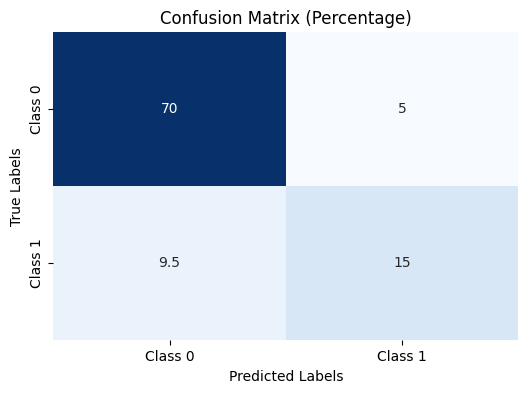

In [35]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predict)
# Calculate percentages
cm_percent = np.round((cm / cm.sum()) * 100, 2)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_percent, annot=True, cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

Precision and Recall:
- For class 0 (salary <= 50k): The precision is 0.88, meaning that when the model predicts a person's salary is below or equals to 50k is correct 88% of the time. The recall is 0.93, which suggests that the model correctly identifies 93% of individuals with salaries below or equals to  50k.
- For class 1 (salary > 50k): The precision is 0.75, which means that when the model predicts a person's salary is above 50k is correct 75% of the time. The recall is 0.62, indicating that the model correctly identifies 62% of the individuals with salaries above 50k.
F1-score:

The F1-score
- For class 0 f1-score is 0.93, and for class 1 is 0.68%. The F1-score provides a balance between precision and recall. In this case, the F1-score for class 0 (salary <= 50k) is higher, indicating better overall performance in distinguishing low-income individuals.

Support:
- For class 0 support is 4535, which is the number of samples in class 0 in the test set.
- For class 1 support is 1498, which is the number of samples in class 1 in the test set.

Accuracy:
- The model has an overall accuracy of 0.85, meaning it correctly predicts 85% of individuals' salaries (both above and below 50k) in the test set.

Confusion matrix:
- For class 0, the true postive is 75% while the false positive is 5%.
-  For class 1, the true negative is 15% while the false negative is 9.5%.

### Predict Salary

In [36]:
# Create a new candidate
new_candidate = pd.DataFrame(
    {
        "Age": [30],
        "Workclass": ["Private"],
        "Final_weight": [77516],
        "Education": ["Bachelors"],
        "Marital_status": ["Never-married"],
        "Occupation": ["Adm-clerical"],
        "Relationship": ["Not-in-family"],
        "Race": ["White"],
        "Sex": ["Male"],
        "Capital_gain": [0],
        "Capital_loss": [0],
        "Hours_per_week": [40],
        "Country": ["United-States"],
    }
)

# Convert categorical variables to dummy variables
new_candidate = pd.get_dummies(new_candidate, columns=cat_vars)

# Ensure that the new_candidate columns are in the same order as the training data
new_candidate = new_candidate.reindex(columns=X_train.columns, fill_value=0)

# Predict the salary of a person
new_salary = rf_classifier.predict(new_candidate)

if new_salary == 0:
    print("The person makes over 50K a year")
else:
    print("The person doesn't make over 50K a year")

The person makes over 50K a year


The above code is an attempt to predict the salary of a new candidate based on a logistic regression model trained on the data.

The code first creates a pandas DataFrame named new_candidate containing the values of the features of the new candidate, including Age, Workclass, Final_weigh, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital-gain, Capital-loss, Hours-per-week, and Country.

Then, the code attempts to predict the salary of the new candidate using the predict method of the logistic regression model that was previously trained. However, since the feature names in new_candidate do not match the feature names used during training, the code raises a ValueError.

To fix this, the feature names in new_candidate should be changed to match the feature names used during training. To do this, the values for the categorical features should be one-hot encoded, similar to how it was done during training.

## Recommendation
Further Investigate Class Imbalance: Since the dataset seems to be imbalanced, consider exploring techniques to address class imbalance, such as resampling methods (e.g., oversampling, undersampling) or using class weights during model training.

## Conclusion
- Model Performance: The machine learning model shows promising performance in predicting individuals' salaries based on the provided features. It achieves an overall accuracy of 85%, indicating that it correctly predicts the salaries (above or below 50k) for the majority of individuals in the test set.
- Distinguishing Low-Income Individuals: The model demonstrates high precision (88%) and recall (93%) for predicting low-income individuals (class 0). This means that the model correctly identifies a high percentage of individuals with salaries below or equal to 50k and has a low false positive rate, making it effective in distinguishing low-income individuals.

- Identifying High-Income Individuals: While the model shows moderate precision (75%) for predicting high-income individuals (class 1), the recall (62%) indicates that it may not capture all high-income individuals. The false negative rate (9.4%) suggests that the model still misses some high-income individuals.